In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import models
from keras import optimizers
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv("sonar.csv", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
shuffled_data = data.sample(frac = 1)
shuffled_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027,R
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085,M
175,0.0294,0.0123,0.0117,0.0113,0.0497,0.0998,0.1326,0.1117,0.2984,0.3473,...,0.0056,0.0104,0.0079,0.0014,0.0054,0.0015,0.0006,0.0081,0.0043,M
145,0.0721,0.1574,0.1112,0.1085,0.0666,0.1800,0.1108,0.2794,0.1408,0.0795,...,0.0309,0.0127,0.0082,0.0281,0.0117,0.0092,0.0147,0.0157,0.0129,M
70,0.0065,0.0122,0.0068,0.0108,0.0217,0.0284,0.0527,0.0575,0.1054,0.1109,...,0.0069,0.0025,0.0027,0.0052,0.0036,0.0026,0.0036,0.0006,0.0035,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,...,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044,R
89,0.0235,0.0291,0.0749,0.0519,0.0227,0.0834,0.0677,0.2002,0.2876,0.3674,...,0.0083,0.0037,0.0095,0.0105,0.0030,0.0132,0.0068,0.0108,0.0090,R
166,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M
131,0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,...,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086,M


In [4]:
data_set = shuffled_data.values
data_set

array([[0.0108, 0.0086, 0.0058, ..., 0.0026, 0.0027, 'R'],
       [0.0412, 0.1135, 0.0518, ..., 0.0098, 0.0085, 'M'],
       [0.0294, 0.0123, 0.0117, ..., 0.0081, 0.0043, 'M'],
       ...,
       [0.0411, 0.0277, 0.0604, ..., 0.0085, 0.0044, 'M'],
       [0.115, 0.1163, 0.0866, ..., 0.0068, 0.0086, 'M'],
       [0.0731, 0.1249, 0.1665, ..., 0.0207, 0.0057, 'M']], dtype=object)

In [5]:
x_train = data_set[:144,:60].astype("float32")
y_train = data_set[:144,60]

x_test = data_set[144:185,:60].astype("float32")
y_test = data_set[144:185,60]

x_val = data_set[185:,:60].astype("float32")
y_val = data_set[185:,60]

In [6]:
le = LabelEncoder()
encoded_y_train = le.fit_transform(y_train)
encoded_y_test = le.fit_transform(y_test)
encoded_y_val = le.fit_transform(y_val)

In [7]:
def neural_model():
    model = models.Sequential()
    model.add(layers.Dense(60, activation = "relu"))
    model.add(layers.Dense(30, activation = "relu"))
    model.add(layers.Dense(1, activation = "sigmoid"))
    model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
    return model

In [8]:
model = neural_model()

In [9]:
model.fit(x_train, encoded_y_train, epochs = 200)

Epoch 1/200
144/144 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5486
Epoch 2/200
144/144 [==============================] - 0s 83us/step - loss: 0.6619 - accuracy: 0.6458
Epoch 3/200
144/144 [==============================] - 0s 104us/step - loss: 0.6542 - accuracy: 0.5903
Epoch 4/200
144/144 [==============================] - 0s 132us/step - loss: 0.6431 - accuracy: 0.5764
Epoch 5/200
144/144 [==============================] - 0s 152us/step - loss: 0.6277 - accuracy: 0.6528
Epoch 6/200
144/144 [==============================] - 0s 90us/step - loss: 0.6209 - accuracy: 0.6736
Epoch 7/200
144/144 [==============================] - 0s 125us/step - loss: 0.6058 - accuracy: 0.6806
Epoch 8/200
144/144 [==============================] - 0s 125us/step - loss: 0.5935 - accuracy: 0.7292
Epoch 9/200
144/144 [==============================] - 0s 145us/step - loss: 0.5782 - accuracy: 0.7431
Epoch 10/200
144/144 [==============================] - 0s 145us/step - loss:

Epoch 80/200
144/144 [==============================] - 0s 104us/step - loss: 0.2425 - accuracy: 0.8889
Epoch 81/200
144/144 [==============================] - 0s 111us/step - loss: 0.2237 - accuracy: 0.9167
Epoch 82/200
144/144 [==============================] - 0s 83us/step - loss: 0.2396 - accuracy: 0.9028
Epoch 83/200
144/144 [==============================] - 0s 97us/step - loss: 0.2127 - accuracy: 0.9375
Epoch 84/200
144/144 [==============================] - 0s 90us/step - loss: 0.2157 - accuracy: 0.9236
Epoch 85/200
144/144 [==============================] - 0s 83us/step - loss: 0.2057 - accuracy: 0.9236
Epoch 86/200
144/144 [==============================] - 0s 104us/step - loss: 0.2012 - accuracy: 0.9375
Epoch 87/200
144/144 [==============================] - 0s 111us/step - loss: 0.2082 - accuracy: 0.9375
Epoch 88/200
144/144 [==============================] - 0s 111us/step - loss: 0.1979 - accuracy: 0.9306
Epoch 89/200
144/144 [==============================] - 0s 111us/ste

144/144 [==============================] - 0s 97us/step - loss: 0.0603 - accuracy: 1.0000
Epoch 159/200
144/144 [==============================] - 0s 111us/step - loss: 0.0592 - accuracy: 1.0000
Epoch 160/200
144/144 [==============================] - 0s 118us/step - loss: 0.0593 - accuracy: 1.0000
Epoch 161/200
144/144 [==============================] - 0s 111us/step - loss: 0.0722 - accuracy: 0.9931
Epoch 162/200
144/144 [==============================] - 0s 111us/step - loss: 0.0612 - accuracy: 0.9931
Epoch 163/200
144/144 [==============================] - 0s 111us/step - loss: 0.0905 - accuracy: 0.9792
Epoch 164/200
144/144 [==============================] - 0s 104us/step - loss: 0.0573 - accuracy: 0.9931
Epoch 165/200
144/144 [==============================] - 0s 104us/step - loss: 0.0551 - accuracy: 1.0000
Epoch 166/200
144/144 [==============================] - 0s 111us/step - loss: 0.0560 - accuracy: 1.0000
Epoch 167/200
144/144 [==============================] - 0s 111us/step

In [10]:
results = model.evaluate(x_test, encoded_y_test, verbose = 2)

In [11]:
results

[0.7469842128637361, 0.7560975551605225]

In [12]:
model_2 = neural_model()

history = model_2.fit(x_train, encoded_y_train,validation_data = (x_val, encoded_y_val), epochs = 200)

Train on 144 samples, validate on 23 samples
Epoch 1/200
144/144 [==============================] - 0s 769us/step - loss: 0.7046 - accuracy: 0.5347 - val_loss: 0.6939 - val_accuracy: 0.6522
Epoch 2/200
144/144 [==============================] - 0s 159us/step - loss: 0.6593 - accuracy: 0.6528 - val_loss: 0.6332 - val_accuracy: 0.6522
Epoch 3/200
144/144 [==============================] - 0s 180us/step - loss: 0.6445 - accuracy: 0.6319 - val_loss: 0.6325 - val_accuracy: 0.6087
Epoch 4/200
144/144 [==============================] - 0s 145us/step - loss: 0.6381 - accuracy: 0.6458 - val_loss: 0.6428 - val_accuracy: 0.6087
Epoch 5/200
144/144 [==============================] - 0s 139us/step - loss: 0.6238 - accuracy: 0.6458 - val_loss: 0.6388 - val_accuracy: 0.6087
Epoch 6/200
144/144 [==============================] - 0s 118us/step - loss: 0.6168 - accuracy: 0.7222 - val_loss: 0.6037 - val_accuracy: 0.7826
Epoch 7/200
144/144 [==============================] - 0s 159us/step - loss: 0.5991 -

Epoch 57/200
144/144 [==============================] - 0s 145us/step - loss: 0.2973 - accuracy: 0.8819 - val_loss: 0.3369 - val_accuracy: 0.8696
Epoch 58/200
144/144 [==============================] - 0s 152us/step - loss: 0.2982 - accuracy: 0.8889 - val_loss: 0.3300 - val_accuracy: 0.8261
Epoch 59/200
144/144 [==============================] - 0s 132us/step - loss: 0.3043 - accuracy: 0.8958 - val_loss: 0.3113 - val_accuracy: 0.8696
Epoch 60/200
144/144 [==============================] - 0s 132us/step - loss: 0.2974 - accuracy: 0.8889 - val_loss: 0.3236 - val_accuracy: 0.8261
Epoch 61/200
144/144 [==============================] - 0s 152us/step - loss: 0.2780 - accuracy: 0.9028 - val_loss: 0.3160 - val_accuracy: 0.7826
Epoch 62/200
144/144 [==============================] - 0s 125us/step - loss: 0.2746 - accuracy: 0.9028 - val_loss: 0.3101 - val_accuracy: 0.8696
Epoch 63/200
144/144 [==============================] - 0s 125us/step - loss: 0.2842 - accuracy: 0.9028 - val_loss: 0.3037 -

144/144 [==============================] - 0s 111us/step - loss: 0.1346 - accuracy: 0.9514 - val_loss: 0.2814 - val_accuracy: 0.7826
Epoch 114/200
144/144 [==============================] - 0s 118us/step - loss: 0.1280 - accuracy: 0.9653 - val_loss: 0.3072 - val_accuracy: 0.8261
Epoch 115/200
144/144 [==============================] - 0s 118us/step - loss: 0.1213 - accuracy: 0.9792 - val_loss: 0.3141 - val_accuracy: 0.8261
Epoch 116/200
144/144 [==============================] - 0s 118us/step - loss: 0.1144 - accuracy: 0.9861 - val_loss: 0.2739 - val_accuracy: 0.8696
Epoch 117/200
144/144 [==============================] - 0s 132us/step - loss: 0.1138 - accuracy: 0.9653 - val_loss: 0.2873 - val_accuracy: 0.7826
Epoch 118/200
144/144 [==============================] - 0s 125us/step - loss: 0.1138 - accuracy: 0.9861 - val_loss: 0.2814 - val_accuracy: 0.7826
Epoch 119/200
144/144 [==============================] - 0s 111us/step - loss: 0.1190 - accuracy: 0.9514 - val_loss: 0.2934 - val_ac

Epoch 169/200
144/144 [==============================] - 0s 132us/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.3398 - val_accuracy: 0.7826
Epoch 170/200
144/144 [==============================] - 0s 166us/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.3234 - val_accuracy: 0.8261
Epoch 171/200
144/144 [==============================] - 0s 118us/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.3193 - val_accuracy: 0.8261
Epoch 172/200
144/144 [==============================] - 0s 132us/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.5722 - val_accuracy: 0.8261
Epoch 173/200
144/144 [==============================] - 0s 118us/step - loss: 0.0580 - accuracy: 0.9861 - val_loss: 0.3284 - val_accuracy: 0.8696
Epoch 174/200
144/144 [==============================] - 0s 139us/step - loss: 0.0535 - accuracy: 0.9931 - val_loss: 0.3312 - val_accuracy: 0.7826
Epoch 175/200
144/144 [==============================] - 0s 125us/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0

In [13]:
results = model_2.fit(x_test, encoded_y_test, verbose = 2)

Epoch 1/1
 - 0s - loss: 0.5083 - accuracy: 0.8780


In [14]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

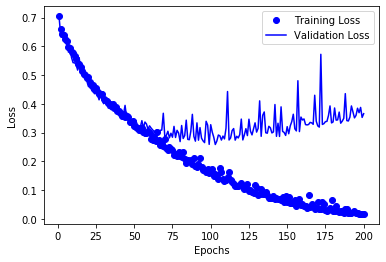

In [15]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import KFold

n_split = 10

for train_index, test_index in KFold(n_split).split(x_train):
    
    
    model = neural_model()
    model.fit(x_train, encoded_y_train, epochs = 100)

Epoch 1/100
144/144 [==============================] - 0s 630us/step - loss: 0.7147 - accuracy: 0.3889
Epoch 2/100
144/144 [==============================] - 0s 97us/step - loss: 0.6859 - accuracy: 0.5625
Epoch 3/100
144/144 [==============================] - 0s 132us/step - loss: 0.6739 - accuracy: 0.5694
Epoch 4/100
144/144 [==============================] - 0s 97us/step - loss: 0.6656 - accuracy: 0.7014
Epoch 5/100
144/144 [==============================] - 0s 132us/step - loss: 0.6529 - accuracy: 0.6389
Epoch 6/100
144/144 [==============================] - 0s 125us/step - loss: 0.6447 - accuracy: 0.6944
Epoch 7/100
144/144 [==============================] - 0s 132us/step - loss: 0.6371 - accuracy: 0.6528
Epoch 8/100
144/144 [==============================] - 0s 145us/step - loss: 0.6260 - accuracy: 0.6944
Epoch 9/100
144/144 [==============================] - 0s 125us/step - loss: 0.6164 - accuracy: 0.7222
Epoch 10/100
144/144 [==============================] - 0s 132us/step - los

144/144 [==============================] - 0s 111us/step - loss: 0.2828 - accuracy: 0.8889
Epoch 80/100
144/144 [==============================] - 0s 118us/step - loss: 0.2616 - accuracy: 0.9097
Epoch 81/100
144/144 [==============================] - 0s 118us/step - loss: 0.2593 - accuracy: 0.9097
Epoch 82/100
144/144 [==============================] - 0s 104us/step - loss: 0.2517 - accuracy: 0.9236
Epoch 83/100
144/144 [==============================] - 0s 104us/step - loss: 0.2690 - accuracy: 0.9028
Epoch 84/100
144/144 [==============================] - 0s 104us/step - loss: 0.2472 - accuracy: 0.9236
Epoch 85/100
144/144 [==============================] - 0s 104us/step - loss: 0.2474 - accuracy: 0.9097
Epoch 86/100
144/144 [==============================] - 0s 111us/step - loss: 0.2379 - accuracy: 0.9097
Epoch 87/100
144/144 [==============================] - 0s 97us/step - loss: 0.2445 - accuracy: 0.9097
Epoch 88/100
144/144 [==============================] - 0s 83us/step - loss: 0

144/144 [==============================] - 0s 90us/step - loss: 0.3056 - accuracy: 0.9028
Epoch 59/100
144/144 [==============================] - 0s 111us/step - loss: 0.3013 - accuracy: 0.8819
Epoch 60/100
144/144 [==============================] - 0s 111us/step - loss: 0.3045 - accuracy: 0.8958
Epoch 61/100
144/144 [==============================] - 0s 125us/step - loss: 0.2947 - accuracy: 0.9097
Epoch 62/100
144/144 [==============================] - 0s 125us/step - loss: 0.2993 - accuracy: 0.9028
Epoch 63/100
144/144 [==============================] - 0s 111us/step - loss: 0.2859 - accuracy: 0.9028
Epoch 64/100
144/144 [==============================] - 0s 125us/step - loss: 0.2832 - accuracy: 0.9028
Epoch 65/100
144/144 [==============================] - 0s 111us/step - loss: 0.2842 - accuracy: 0.9028
Epoch 66/100
144/144 [==============================] - 0s 111us/step - loss: 0.2878 - accuracy: 0.9028
Epoch 67/100
144/144 [==============================] - 0s 111us/step - loss: 

144/144 [==============================] - 0s 90us/step - loss: 0.3789 - accuracy: 0.8681
Epoch 38/100
144/144 [==============================] - 0s 83us/step - loss: 0.3751 - accuracy: 0.8542
Epoch 39/100
144/144 [==============================] - 0s 97us/step - loss: 0.3616 - accuracy: 0.8819
Epoch 40/100
144/144 [==============================] - 0s 97us/step - loss: 0.3618 - accuracy: 0.8750
Epoch 41/100
144/144 [==============================] - 0s 118us/step - loss: 0.3546 - accuracy: 0.8819
Epoch 42/100
144/144 [==============================] - 0s 104us/step - loss: 0.3542 - accuracy: 0.8889
Epoch 43/100
144/144 [==============================] - 0s 104us/step - loss: 0.3397 - accuracy: 0.8819
Epoch 44/100
144/144 [==============================] - 0s 90us/step - loss: 0.3507 - accuracy: 0.8681
Epoch 45/100
144/144 [==============================] - 0s 83us/step - loss: 0.3461 - accuracy: 0.8750
Epoch 46/100
144/144 [==============================] - 0s 90us/step - loss: 0.3399

144/144 [==============================] - 0s 97us/step - loss: 0.4987 - accuracy: 0.7986
Epoch 17/100
144/144 [==============================] - 0s 90us/step - loss: 0.4928 - accuracy: 0.8125
Epoch 18/100
144/144 [==============================] - 0s 83us/step - loss: 0.4916 - accuracy: 0.7986
Epoch 19/100
144/144 [==============================] - 0s 104us/step - loss: 0.4770 - accuracy: 0.8056
Epoch 20/100
144/144 [==============================] - 0s 104us/step - loss: 0.4724 - accuracy: 0.7917
Epoch 21/100
144/144 [==============================] - 0s 104us/step - loss: 0.4657 - accuracy: 0.7917
Epoch 22/100
144/144 [==============================] - 0s 118us/step - loss: 0.4555 - accuracy: 0.7917
Epoch 23/100
144/144 [==============================] - 0s 118us/step - loss: 0.4462 - accuracy: 0.8125
Epoch 24/100
144/144 [==============================] - 0s 125us/step - loss: 0.4393 - accuracy: 0.8333
Epoch 25/100
144/144 [==============================] - 0s 111us/step - loss: 0.

144/144 [==============================] - 0s 97us/step - loss: 0.2009 - accuracy: 0.9375
Epoch 96/100
144/144 [==============================] - 0s 132us/step - loss: 0.1766 - accuracy: 0.9653
Epoch 97/100
144/144 [==============================] - 0s 104us/step - loss: 0.1709 - accuracy: 0.9514
Epoch 98/100
144/144 [==============================] - 0s 118us/step - loss: 0.2021 - accuracy: 0.9167
Epoch 99/100
144/144 [==============================] - 0s 118us/step - loss: 0.1625 - accuracy: 0.9722
Epoch 100/100
144/144 [==============================] - 0s 104us/step - loss: 0.1571 - accuracy: 0.9653
Epoch 1/100
144/144 [==============================] - 0s 637us/step - loss: 0.6802 - accuracy: 0.5764
Epoch 2/100
144/144 [==============================] - 0s 104us/step - loss: 0.6635 - accuracy: 0.5486
Epoch 3/100
144/144 [==============================] - 0s 83us/step - loss: 0.6553 - accuracy: 0.5972
Epoch 4/100
144/144 [==============================] - 0s 104us/step - loss: 0.64

144/144 [==============================] - 0s 111us/step - loss: 0.2509 - accuracy: 0.9236
Epoch 75/100
144/144 [==============================] - 0s 104us/step - loss: 0.2681 - accuracy: 0.9028
Epoch 76/100
144/144 [==============================] - 0s 83us/step - loss: 0.2652 - accuracy: 0.9097
Epoch 77/100
144/144 [==============================] - 0s 90us/step - loss: 0.2584 - accuracy: 0.8958
Epoch 78/100
144/144 [==============================] - 0s 111us/step - loss: 0.2521 - accuracy: 0.9167
Epoch 79/100
144/144 [==============================] - 0s 90us/step - loss: 0.2383 - accuracy: 0.9375
Epoch 80/100
144/144 [==============================] - 0s 111us/step - loss: 0.2573 - accuracy: 0.8958
Epoch 81/100
144/144 [==============================] - 0s 111us/step - loss: 0.2405 - accuracy: 0.9097
Epoch 82/100
144/144 [==============================] - 0s 111us/step - loss: 0.2448 - accuracy: 0.8958
Epoch 83/100
144/144 [==============================] - 0s 111us/step - loss: 0.

144/144 [==============================] - 0s 90us/step - loss: 0.3301 - accuracy: 0.8889
Epoch 54/100
144/144 [==============================] - 0s 111us/step - loss: 0.3351 - accuracy: 0.8889
Epoch 55/100
144/144 [==============================] - 0s 83us/step - loss: 0.3098 - accuracy: 0.8958
Epoch 56/100
144/144 [==============================] - 0s 97us/step - loss: 0.3128 - accuracy: 0.8889
Epoch 57/100
144/144 [==============================] - 0s 104us/step - loss: 0.3100 - accuracy: 0.9028
Epoch 58/100
144/144 [==============================] - 0s 104us/step - loss: 0.3013 - accuracy: 0.9167
Epoch 59/100
144/144 [==============================] - 0s 118us/step - loss: 0.3094 - accuracy: 0.8611
Epoch 60/100
144/144 [==============================] - 0s 118us/step - loss: 0.3041 - accuracy: 0.9097
Epoch 61/100
144/144 [==============================] - 0s 97us/step - loss: 0.2950 - accuracy: 0.9028
Epoch 62/100
144/144 [==============================] - 0s 111us/step - loss: 0.3

144/144 [==============================] - 0s 83us/step - loss: 0.4493 - accuracy: 0.8056
Epoch 33/100
144/144 [==============================] - 0s 111us/step - loss: 0.4408 - accuracy: 0.8264
Epoch 34/100
144/144 [==============================] - 0s 111us/step - loss: 0.4399 - accuracy: 0.8125
Epoch 35/100
144/144 [==============================] - 0s 111us/step - loss: 0.4362 - accuracy: 0.8056
Epoch 36/100
144/144 [==============================] - 0s 111us/step - loss: 0.4263 - accuracy: 0.7917
Epoch 37/100
144/144 [==============================] - 0s 111us/step - loss: 0.4205 - accuracy: 0.8125
Epoch 38/100
144/144 [==============================] - 0s 111us/step - loss: 0.4133 - accuracy: 0.8194
Epoch 39/100
144/144 [==============================] - 0s 104us/step - loss: 0.4121 - accuracy: 0.8194
Epoch 40/100
144/144 [==============================] - 0s 104us/step - loss: 0.4126 - accuracy: 0.8194
Epoch 41/100
144/144 [==============================] - 0s 104us/step - loss: 

144/144 [==============================] - 0s 111us/step - loss: 0.5594 - accuracy: 0.7292
Epoch 12/100
144/144 [==============================] - 0s 118us/step - loss: 0.5517 - accuracy: 0.7431
Epoch 13/100
144/144 [==============================] - 0s 118us/step - loss: 0.5373 - accuracy: 0.7639
Epoch 14/100
144/144 [==============================] - 0s 118us/step - loss: 0.5335 - accuracy: 0.7639
Epoch 15/100
144/144 [==============================] - 0s 111us/step - loss: 0.5175 - accuracy: 0.7569
Epoch 16/100
144/144 [==============================] - 0s 111us/step - loss: 0.5126 - accuracy: 0.7847
Epoch 17/100
144/144 [==============================] - 0s 104us/step - loss: 0.5024 - accuracy: 0.7986
Epoch 18/100
144/144 [==============================] - 0s 111us/step - loss: 0.4944 - accuracy: 0.8056
Epoch 19/100
144/144 [==============================] - 0s 111us/step - loss: 0.4842 - accuracy: 0.7986
Epoch 20/100
144/144 [==============================] - 0s 111us/step - loss:

144/144 [==============================] - 0s 104us/step - loss: 0.2240 - accuracy: 0.9306
Epoch 91/100
144/144 [==============================] - 0s 104us/step - loss: 0.2247 - accuracy: 0.9236
Epoch 92/100
144/144 [==============================] - 0s 76us/step - loss: 0.2460 - accuracy: 0.9097
Epoch 93/100
144/144 [==============================] - 0s 90us/step - loss: 0.2336 - accuracy: 0.9236
Epoch 94/100
144/144 [==============================] - 0s 104us/step - loss: 0.2382 - accuracy: 0.9236
Epoch 95/100
144/144 [==============================] - 0s 90us/step - loss: 0.2096 - accuracy: 0.9375
Epoch 96/100
144/144 [==============================] - 0s 111us/step - loss: 0.2076 - accuracy: 0.9306
Epoch 97/100
144/144 [==============================] - 0s 111us/step - loss: 0.2083 - accuracy: 0.9444
Epoch 98/100
144/144 [==============================] - 0s 90us/step - loss: 0.2338 - accuracy: 0.9236
Epoch 99/100
144/144 [==============================] - 0s 104us/step - loss: 0.2

144/144 [==============================] - 0s 97us/step - loss: 0.2724 - accuracy: 0.8958
Epoch 70/100
144/144 [==============================] - 0s 90us/step - loss: 0.2573 - accuracy: 0.8958
Epoch 71/100
144/144 [==============================] - 0s 90us/step - loss: 0.2430 - accuracy: 0.9306
Epoch 72/100
144/144 [==============================] - 0s 111us/step - loss: 0.2403 - accuracy: 0.9167
Epoch 73/100
144/144 [==============================] - 0s 118us/step - loss: 0.2419 - accuracy: 0.9097
Epoch 74/100
144/144 [==============================] - 0s 125us/step - loss: 0.2578 - accuracy: 0.9097
Epoch 75/100
144/144 [==============================] - 0s 111us/step - loss: 0.2409 - accuracy: 0.9375
Epoch 76/100
144/144 [==============================] - 0s 97us/step - loss: 0.2390 - accuracy: 0.9306
Epoch 77/100
144/144 [==============================] - 0s 118us/step - loss: 0.2315 - accuracy: 0.9306
Epoch 78/100
144/144 [==============================] - 0s 125us/step - loss: 0.2

144/144 [==============================] - 0s 111us/step - loss: 0.3402 - accuracy: 0.8889
Epoch 49/100
144/144 [==============================] - 0s 83us/step - loss: 0.3338 - accuracy: 0.9097
Epoch 50/100
144/144 [==============================] - 0s 76us/step - loss: 0.3316 - accuracy: 0.8958
Epoch 51/100
144/144 [==============================] - 0s 104us/step - loss: 0.3253 - accuracy: 0.9028
Epoch 52/100
144/144 [==============================] - 0s 111us/step - loss: 0.3254 - accuracy: 0.8750
Epoch 53/100
144/144 [==============================] - 0s 111us/step - loss: 0.3181 - accuracy: 0.8889
Epoch 54/100
144/144 [==============================] - 0s 104us/step - loss: 0.3174 - accuracy: 0.9028
Epoch 55/100
144/144 [==============================] - 0s 111us/step - loss: 0.3134 - accuracy: 0.9028
Epoch 56/100
144/144 [==============================] - 0s 111us/step - loss: 0.3031 - accuracy: 0.9236
Epoch 57/100
144/144 [==============================] - 0s 111us/step - loss: 0

In [17]:
model.evaluate(x_test, encoded_y_test)

41/41 [==============================] - 0s 511us/step


[0.5144538850319095, 0.7317073345184326]